In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import import_ipynb
from FCorrelación_parcial import lcorr
from scipy.fftpack import fft, fftfreq, ifft
import bioread
import pandas as pd

- - -

    1. Determina, haciendo uso de las herramientas aprendidas en este tema, en qué columna de la matriz “data.xlsx” se encuentra la señal de pletismografía (canal 3) del registro 1 (reg1.acq).

In [8]:
#Importar las señales
registro = bioread.read_file('reg1.acq')
datos = pd.read_excel('data.xlsx', header = None)
datos = datos.to_numpy()

In [9]:
registro.channels #Samples por segundo es la frecuencia de muestro

[Channel ECG (.05 - 150 Hz): 40000 samples, 2000.0 samples/sec, loaded: True,
 Channel EMG (30 - 500 Hz): 40000 samples, 2000.0 samples/sec, loaded: True,
 Channel Force (0 - 50 grams): 40000 samples, 2000.0 samples/sec, loaded: True,
 Channel PPG (.5 - 35 Hz): 40000 samples, 2000.0 samples/sec, loaded: True]

In [10]:
datos.shape 

(40000, 10)

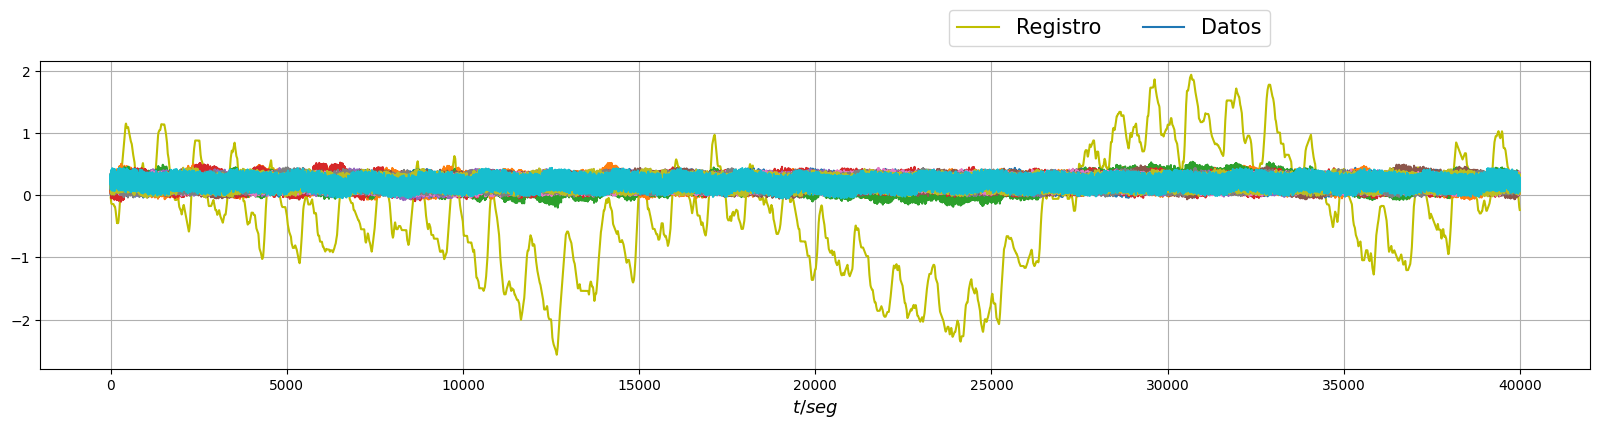

In [11]:
N = 40000
Fs = 2000

Reg = registro.channels[3].data 

n = np.arange (len(Reg))
t = n/Fs

plt.figure(figsize=(20,4))
plt.plot(n,Reg,color='y')
plt.plot(n,datos)
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('Registro',"Datos"),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

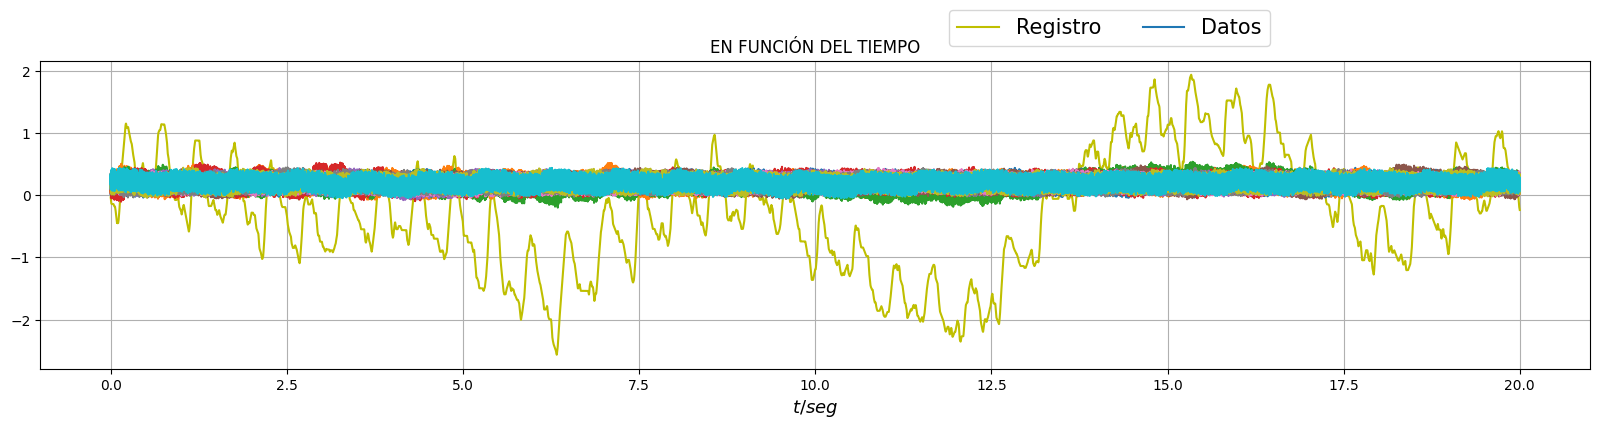

In [12]:
#EN FUNCIÓN DEL TIEMPO

plt.figure(figsize=(20,4))
plt.plot(n/Fs,Reg,color='y')
plt.plot(n/Fs,datos)
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('Registro',"Datos"),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.title ("EN FUNCIÓN DEL TIEMPO")
plt.show()

In [13]:
#Calculo cada una de las correlaciones para ver con cuál hay mayor similitud.
c0 = lcorr(Reg,datos[:,0])
c1 = lcorr(Reg,datos[:,1])
c2 = lcorr(Reg,datos[:,2])
c3 = lcorr(Reg,datos[:,3])
c4 = lcorr(Reg,datos[:,4])
c5 = lcorr(Reg,datos[:,5])
c6 = lcorr(Reg,datos[:,6])
c7 = lcorr(Reg,datos[:,7])
c8 = lcorr(Reg,datos[:,8])
c9 = lcorr(Reg,datos[:,9])

max = np.zeros(10)
max[0]=(np.max(c0[:,1]))
max[1]=(np.max(c1[:,1]))
max[2]=(np.max(c2[:,1]))
max[3]=(np.max(c3[:,1]))
max[4]=(np.max(c4[:,1]))
max[5]=(np.max(c5[:,1]))
max[6]=(np.max(c6[:,1]))
max[7]=(np.max(c7[:,1]))
max[8]=(np.max(c8[:,1]))
max[9]=(np.max(c9[:,1]))

print("La columna en la que se encuentra la señal es la:", 1+np.where(max==np.max(max))[0][0])

La columna en la que se encuentra la señal es la: 3


### Verifico gráficamente:

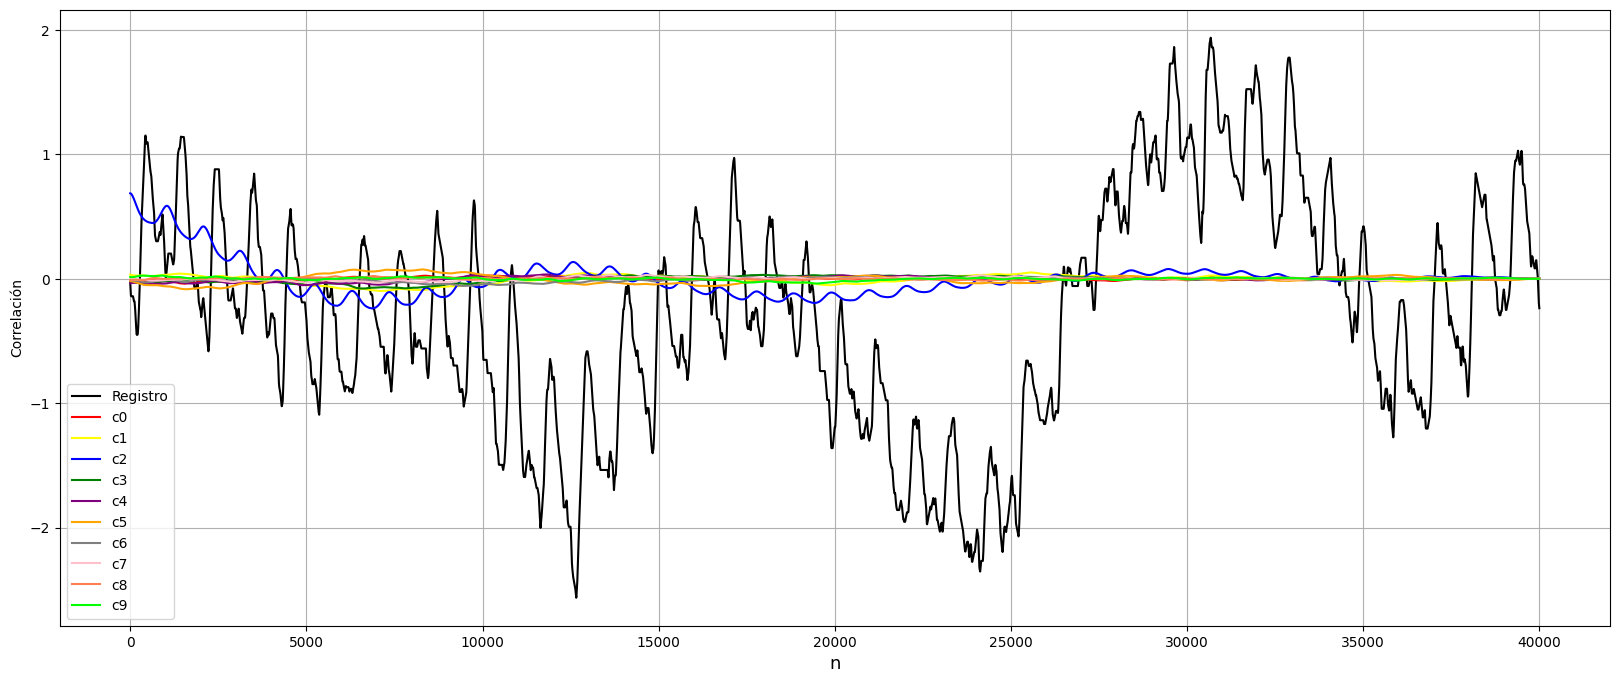

In [14]:
plt.figure(figsize=(20,8))
plt.plot(n,Reg,"black")
plt.plot(c0[:,0],c0[:,1],"red")
plt.plot(c1[:,0],c1[:,1],"yellow")
plt.plot(c2[:,0],c2[:,1],"blue")
plt.plot(c3[:,0],c3[:,1],"green")
plt.plot(c4[:,0],c4[:,1],"purple")
plt.plot(c5[:,0],c5[:,1],"orange")
plt.plot(c6[:,0],c6[:,1],"grey")
plt.plot(c7[:,0],c7[:,1],"pink")
plt.plot(c8[:,0],c8[:,1],"coral")
plt.plot(c9[:,0],c9[:,1],"lime")

plt.legend(('Registro','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'))
plt.ylabel ("Correlación")
plt.xlabel('n',fontsize=13)
plt.grid(True)
plt.show()

### De la gráfica anterior podemos observar que la c2, es decir la correlación con la columna 3 de los datos es con la que se encuentra mayor similitud.

- - -

# MODO PRO

In [15]:
R = np.empty ((40000,10))

for i in range (10):
    R[:,i] = lcorr (datos[:,i],Reg)[:,1]

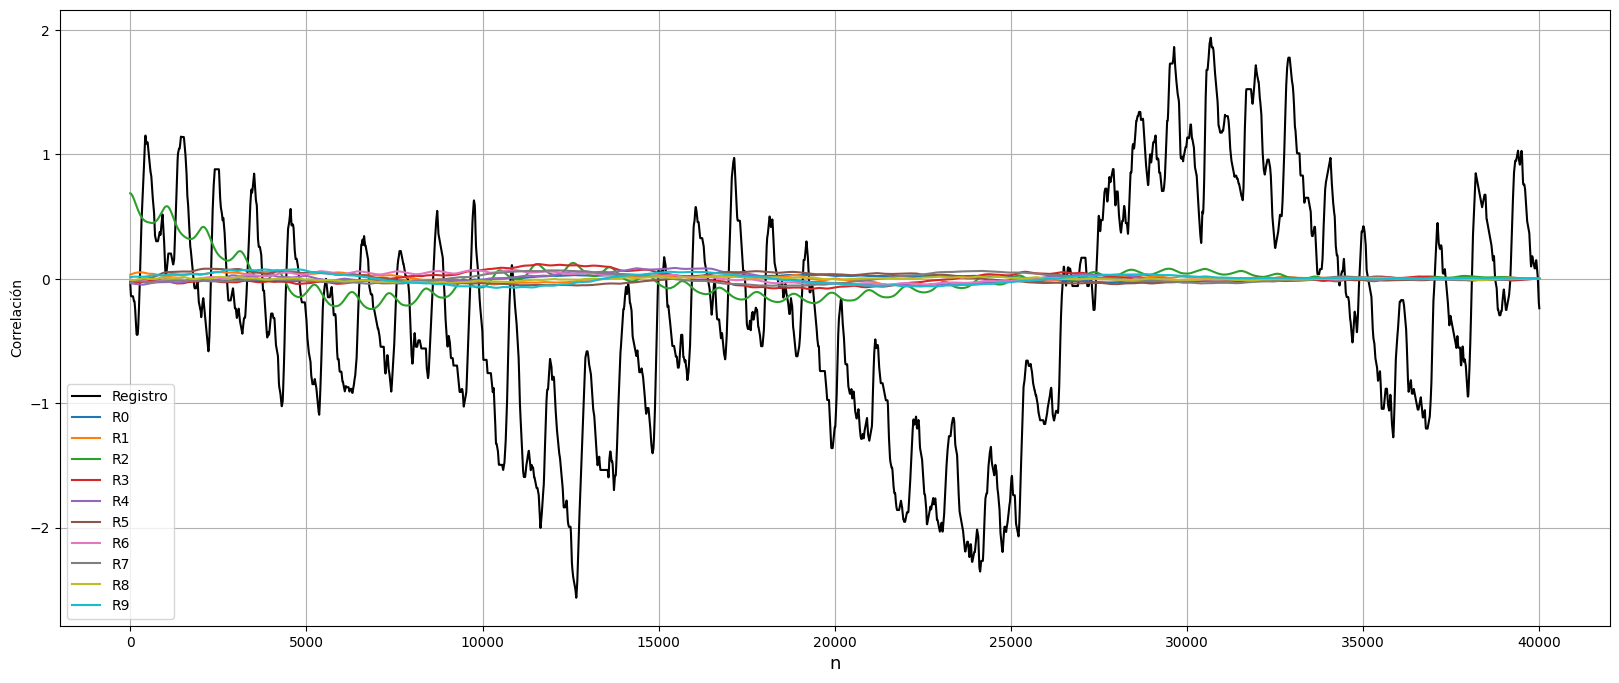

In [16]:
plt.figure(figsize=(20,8))
plt.plot(n,Reg,"black")
plt.plot(R)


plt.legend(('Registro','R0','R1','R2','R3','R4','R5','R6','R7','R8','R9'))
plt.ylabel ("Correlación")
plt.xlabel('n',fontsize=13)
plt.grid(True)
plt.show()

- - -